               Price  Market_Cap
Date                            
2013-08-04  0.005874  45921034.0
2013-08-05  0.005653  44191247.0
2013-08-06  0.004669  36500633.0
2013-08-07  0.004486  35071445.0
2013-08-08  0.004196  32800191.0


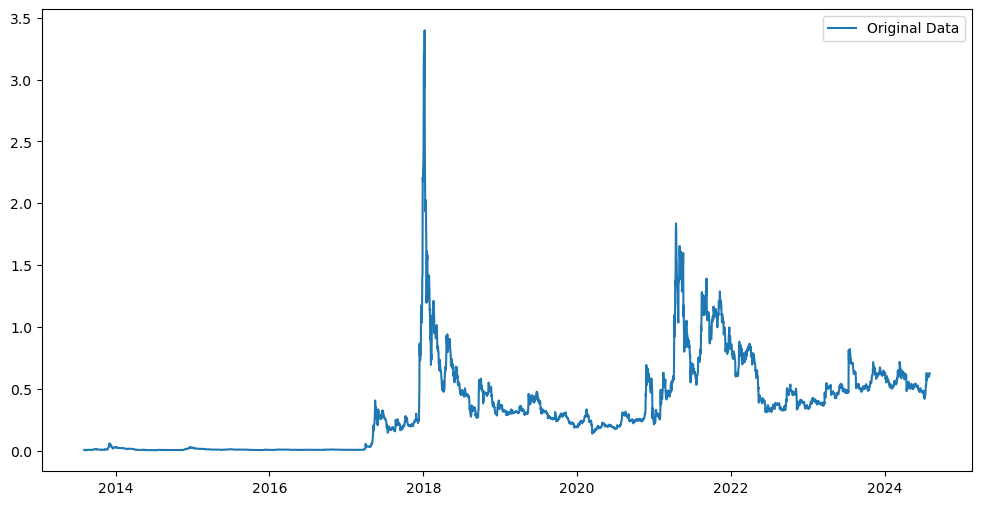

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\ghwns\\Desktop\\개인 프로젝트\\1.XRP 가격 변동 시계열 분석(20240721~20240806)\\Dataset\\xrp-usd-max.csv"
                , parse_dates = ['Date'], index_col = 'Date')
print(df.head())

price_data = df['Price']

train_size = int(len(df) * 0.8)
train, test = price_data.iloc[:train_size], price_data.iloc[train_size:]

plt.figure(figsize = (12, 6))
plt.plot(df['Price'], label = 'Original Data')
plt.legend()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

series = df['Price'].values
result = adfuller(series)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] > 0.05:
    train_diff = train.diff().dropna()
else:
    train_diff = train

ADF Statistic: -3.736490
p-value: 0.003628
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


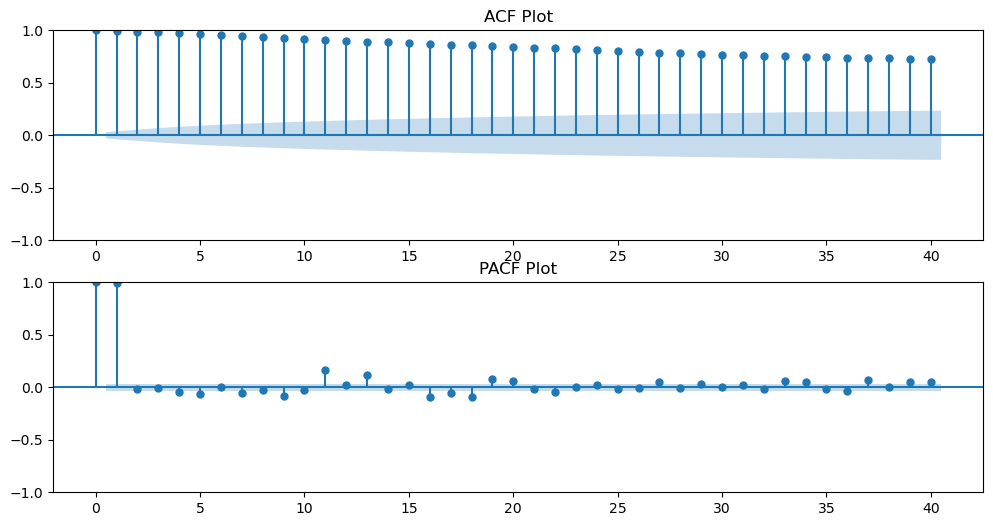

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

plt.figure(figsize = (12, 6))

plt.subplot(211)
plot_acf(series, ax = plt.gca(), lags = 40, title = 'ACF Plot')

plt.subplot(212)
plot_pacf(series, ax = plt.gca(), lags = 40, title = 'PACF Plot')

plt.show()

C:\Users\ghwns\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghwns\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghwns\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghwns\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

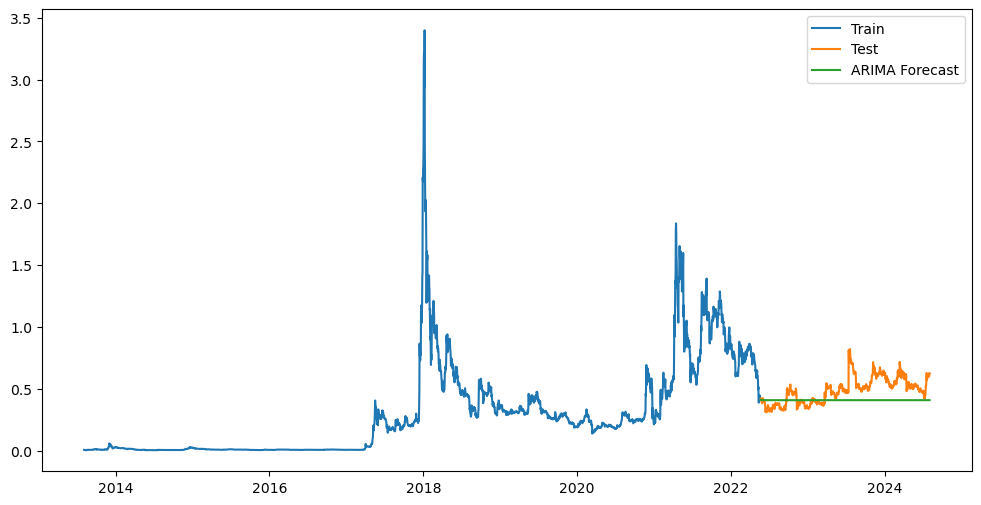

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 3208
Model:                 ARIMA(2, 1, 2)   Log Likelihood                5487.835
Date:                Mon, 05 Aug 2024   AIC                         -10965.669
Time:                        21:13:50   BIC                         -10935.304
Sample:                             0   HQIC                        -10954.784
                               - 3208                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0666      0.355      0.188      0.851      -0.629       0.762
ar.L2          0.5779      0.307      1.882      0.060      -0.024       1.180
ma.L1         -0.0366      0.356     -0.103      0.9

In [20]:
from statsmodels.tsa.arima.model import ARIMA

p = 2
d = 1  
q = 2

arima_model = ARIMA(train, order=(p, d, q))
arima_result = arima_model.fit()


arima_forecast = arima_result.forecast(steps=len(test))


plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.show()

print(arima_result.summary())


C:\Users\ghwns\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghwns\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ghwns\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\ghwns\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will co

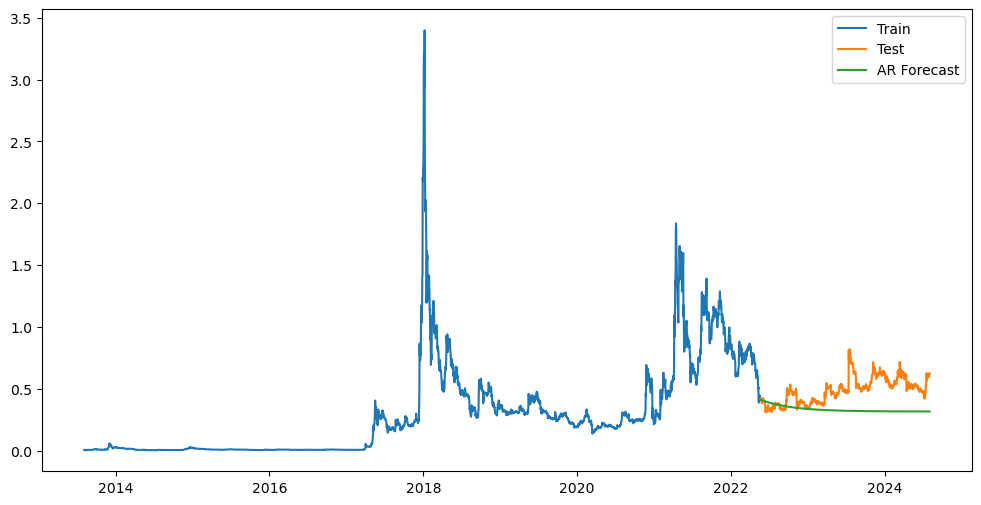

                            AutoReg Model Results                             
Dep. Variable:                  Price   No. Observations:                 3208
Model:                     AutoReg(1)   Log Likelihood                5488.558
Method:               Conditional MLE   S.D. of innovations              0.044
Date:                Mon, 05 Aug 2024   AIC                         -10971.116
Time:                        21:02:24   BIC                         -10952.897
Sample:                             1   HQIC                        -10964.585
                                 3208                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.001      2.182      0.029       0.000       0.004
Price.L1       0.9932      0.002    486.786      0.000       0.989       0.997
                                    Roots           

In [14]:
from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(train, lags=p)
ar_result = ar_model.fit()

ar_forecast = ar_result.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, ar_forecast, label='AR Forecast')
plt.legend()
plt.show()

print(ar_result.summary())

C:\Users\ghwns\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghwns\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghwns\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghwns\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

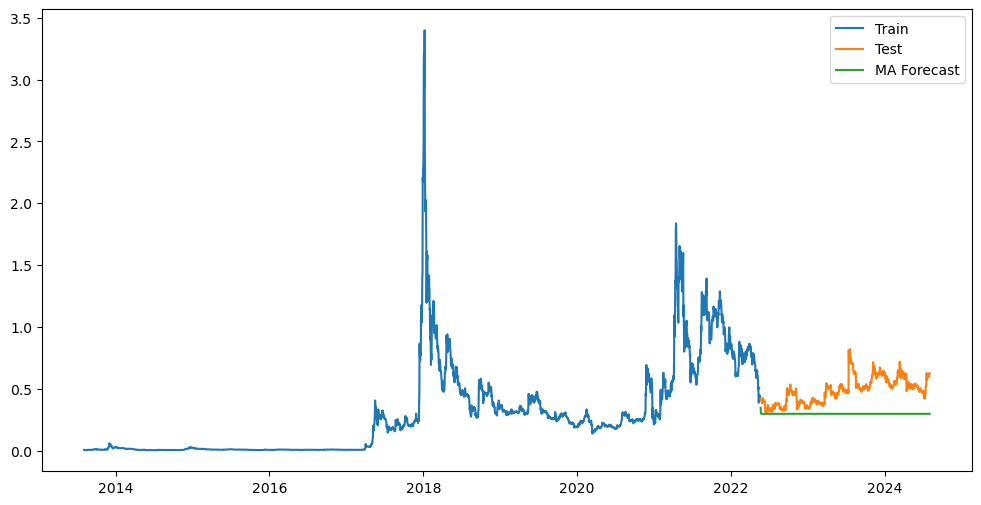

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 3208
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 578.235
Date:                Mon, 05 Aug 2024   AIC                          -1150.470
Time:                        21:03:13   BIC                          -1132.250
Sample:                             0   HQIC                         -1143.938
                               - 3208                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2974      0.010     30.598      0.000       0.278       0.316
ma.L1          0.9495      0.003    352.737      0.000       0.944       0.955
sigma2         0.0408      0.001     71.696      0.0

In [15]:
ma_model = ARIMA(train, order=(0, 0, q))
ma_result = ma_model.fit()


ma_forecast = ma_result.forecast(steps=len(test))


plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, ma_forecast, label='MA Forecast')
plt.legend()
plt.show()

print(ma_result.summary())

C:\Users\ghwns\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghwns\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghwns\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghwns\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

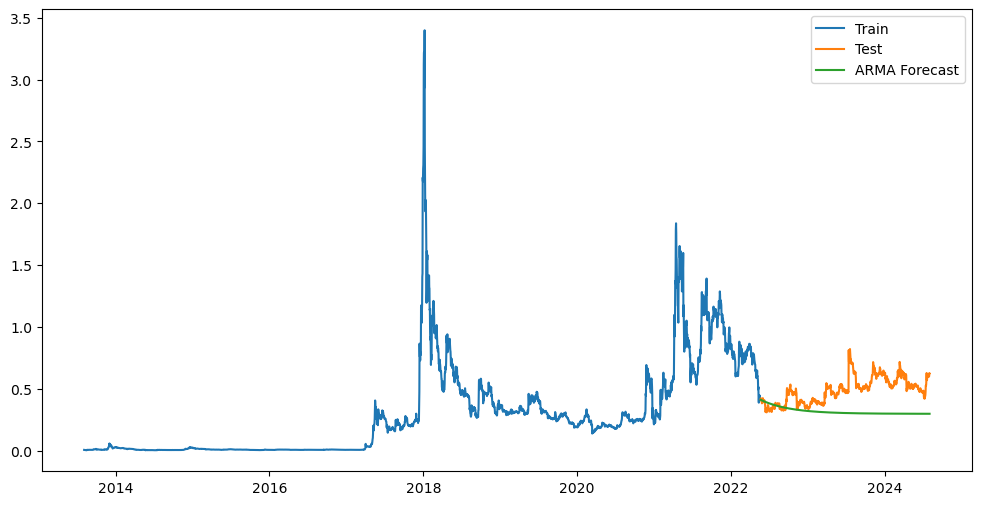

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 3208
Model:                 ARIMA(1, 0, 1)   Log Likelihood                5489.424
Date:                Mon, 05 Aug 2024   AIC                         -10970.849
Time:                        21:03:27   BIC                         -10946.555
Sample:                             0   HQIC                        -10962.140
                               - 3208                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2975      0.194      1.533      0.125      -0.083       0.678
ar.L1          0.9929      0.001   1025.372      0.000       0.991       0.995
ma.L1          0.0266      0.005      5.443      0.0

In [16]:

arma_model = ARIMA(train, order=(p, 0, q))
arma_result = arma_model.fit()


arma_forecast = arma_result.forecast(steps=len(test))


plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, arma_forecast, label='ARMA Forecast')
plt.legend()
plt.show()

print(arma_result.summary())

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_forecast(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    mse = mean_squared_error(true_values, predicted_values)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100
    
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape}%')
    
    return mae, mse, rmse, mape

print("ARIMA Model Performance:")
evaluate_forecast(test, arima_forecast)

print("AR Model Performance:")
evaluate_forecast(test, ar_forecast)

print("MA Model Performance:")
evaluate_forecast(test, ma_forecast)

print("ARMA Model Performance:")
evaluate_forecast(test, arma_forecast)


ARIMA Model Performance:
MAE: 0.10361137538517874
MSE: 0.016534242788225306
RMSE: 0.12858554657590918
MAPE: nan%
AR Model Performance:
MAE: 0.1609953400633557
MSE: 0.03735381407283633
RMSE: 0.19327134829776588
MAPE: nan%
MA Model Performance:
MAE: 0.1892053402162964
MSE: 0.04608887654452786
RMSE: 0.21468320042455083
MAPE: nan%
ARMA Model Performance:
MAE: 0.17570399132745995
MSE: 0.043322005719260696
RMSE: 0.20813939011936375
MAPE: nan%


C:\Users\ghwns\AppData\Local\Temp\ipykernel_10656\3688624496.py:8: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100
C:\Users\ghwns\AppData\Local\Temp\ipykernel_10656\3688624496.py:8: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100
C:\Users\ghwns\AppData\Local\Temp\ipykernel_10656\3688624496.py:8: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100
C:\Users\ghwns\AppData\Local\Temp\ipykernel_10656\3688624496.py:8: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incom

(0.17570399132745995, 0.043322005719260696, 0.20813939011936375, nan)